In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import math

%run 'shared_functions.ipynb' # holds non-SP specific functions
%run 'notes.ipynb' # holds notes + SP specific functions

# Signal Processing MM1 exercises

## 1.1
A Butterworth low-pass filter is wanted, with the two (standard) requirements:
- $20 \cdot log|H(j \cdot 1 rad/s)| = -3 dB$
- $20 \cdot log|H(j0)| = 0 dB$


### a. Calculate and plot the pole locations for filters of order n = 4 and n = 5
This can be done using the formula from [here](notes.ipynb#butterworth-poles) ($p_k = e^{j(\frac{2k-1}{2n}\pi + \frac{\pi}{2})}$)

In [2]:
polesN4 = butterPolesOut(1,4)
polesN5 = butterPolesOut(1,5)

display(polesN4, polesN5)

[exp(5*I*pi/8), exp(7*I*pi/8), exp(-7*I*pi/8), exp(-5*I*pi/8)]

[exp(3*I*pi/5), exp(4*I*pi/5), -1, exp(-4*I*pi/5), exp(-3*I*pi/5)]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ac5cd4490>)

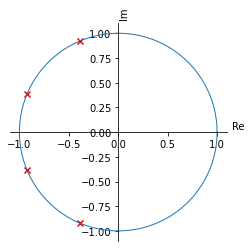

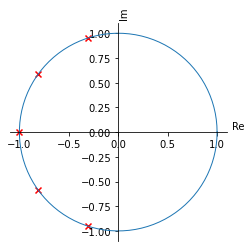

In [3]:
plotPoles(polesN4)
plotPoles(polesN5)

### b. Find an expression for the transfer function from the pole locations for n = 4
Because the function has even poles, and it mirrors itself in the real axis we can write it as such

$$
H(s) = \frac{1}{(s^2+2 \cdot 0.383s + 1)(s^2 + 2 \cdot 0.924s +1)}
$$

In [4]:
zero4, pole4, gain4 = signal.buttap(4)
zero5, pole5, gain5 = signal.buttap(5)
print(pole4)
print(pole5)
print(np.poly(pole4))

# Verify by expanding the expression
s = sp.symbols("s")
sp.expand((s**2 + (2 * 0.383*s) + 1)*(s**2 + (2 * 0.924*s) +1))


[-0.38268343+0.92387953j -0.92387953+0.38268343j -0.92387953-0.38268343j
 -0.38268343-0.92387953j]
[-0.30901699+0.95105652j -0.80901699+0.58778525j -1.        -0.j
 -0.80901699-0.58778525j -0.30901699-0.95105652j]
[1.         2.61312593 3.41421356 2.61312593 1.        ]


s**4 + 2.614*s**3 + 3.415568*s**2 + 2.614*s + 1

## 1.2
A 2nd order Butterworth low-pass filter is to be used in a class-D audio amplifier to pass the audio signal and attenuate the signal at the switching frequency.

- The attenuation at 20 kHz shall be 0.5 dB
- The attenuation at the switching frequency shall be 30 dB

### a. For a normalized ($\omega_{3dB} = 1 rad/s$) 2nd order Butterworth filter, find the radian frequency, where the attenuation is 0.5 dB

We can rewrite the definition for a butterworth filter found [here](notes.ipynb#butterworth-definition)

$$
\left| H(j\omega) \right|^2 = \frac{1}{1+\omega^{2n}}
$$

$$
\begin{align}
\left| H_{norm}(j\omega_{0.5dB}) \right|^2 &= \frac{1}{1+(\omega_{0.5dB})^{2n}} = 10^{-0.5/10} \\
\frac{1}{1+(\omega_{0.5dB})^{2 \cdot 2}} &= 10^{-0.5/10} \\
\frac{1}{10^{-0.5/10}} &= 1+(\omega_{0.5dB})^{4} \\
10^{0.5/10} &= 1+(\omega_{0.5dB})^{4} \\
10^{0.5/10}-1 &= (\omega_{0.5dB})^{4} \\
(10^{0.5/10}-1)^{1/4} &= \omega_{0.5dB} \\
\omega_{0.5dB} &= (10^{0.5/10}-1)^{1/4} = 0.59 \text{ rad/s} \\
\end{align}
$$

Which can be more general as 

$$
\omega_{dB} = (10^{dB/10}-1)^{1/(2 \cdot n)}
$$

In [16]:
fnW = lambda w, n: (10**(w/10)-1)**(1/(n*2))
w_0_5 = fnW(0.5, 2) 
w_0_5

0.5910257187203852

### b. For the normalized filter, find the radian frequency, where the attenuation is 30 dB, and find the transition band ratio, $\omega_{30dB}/\omega_{0.5dB}$

The transition band ratio is also called the shape factor, and is defined as $\omega_s/\omega_p$.
Where can thereby use the same formula as above (output in rad/s), as it is still a normalized filter, and then calculate the shape factor.

In [6]:
w_30 = fnW(30, 2)
display(w_30, w_30/w_0_5)

5.62200687108778

9.51228803250702

A 2nd order Butterworth filter with $\omega_{3dB} = 1 rad/s$, can be made using the circuit shown with 
- $L_1 = 1.4142 H$ 
- $C_2= 0.7071 F$
- $R_L= 1 \Omega$

![circuit](figs/mm1.2.png)

### c. Make a frequency scaling so that the scaled filter has an attenuation of 0.5 dB at 20 kHz. What is the needed frequency scaling factor?

We can find the frequency scaling factor from MM1.S36, given as

$$
k_f =
\frac{\omega_{p,scaled}}{\omega_{p,norm}} =
\frac{2 \cdot \pi f_{p,scaled}}{\omega_{p,norm}}
$$

after that we can use the equations from mm1.s38

![mm1.s38](figs/mm1.s38.png)

In [7]:
from math import pi
L_1norm = 1.4142
C_2norm = 0.7071
R_Lnorm = 1

kf = (2*pi*20*10**3)/(w_0_5)
L_1 = L_1norm/kf
C_2 = C_2norm/kf

kf, L_1, C_2

(212619.6917718962, 6.651312435901702e-06, 3.325656217950851e-06)

This gives us

- $k_f = 212.6 \cdot 10^3$
- $L_{1} = 6.65 \mu H$
- $C_{2} = 3.32 \mu F$

### d. Find the frequency, where the scaled filter has an attenuation of 30 dB

We rewrite our formula for $k_f$

$$
\begin{align}
k_f &= \frac{2 \cdot \pi f_{p,scaled}}{\omega_{p,norm}} \\
k_f \cdot \omega_{p,norm} &= 2 \cdot \pi f_{p,scaled} \\
\frac{k_f \cdot \omega_{p,norm}}{2 \cdot \pi} &= f_{p,scaled} \\
f_{p,scaled} &= \frac{k_f \cdot \omega_{p,norm}}{2 \cdot \pi} \\
\end{align}
$$

In [8]:
f_30 = (kf*w_30)/(2*pi)
f_30

190245.7606501404

This gives us $f_{30dB} = 190,2 kHz$

### e. Plot the magnitude of the transfer function (dB) in Matlab


Text(0, 0.5, 'phase')

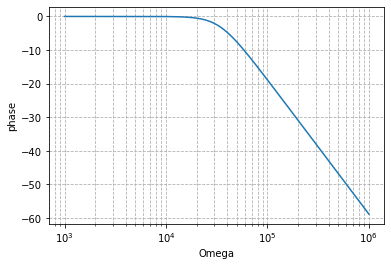

In [9]:
import matplotlib.pyplot as plt

# variables and calculations
n = 2 # order
freq = np.logspace(3,6,1000)
om_norm = (2*pi*freq)/kf
HdB = -10*np.log10(1+np.power(om_norm, 2*n))

# graph
fig, ax = plt.subplots()
ax.grid(b=True, which="both", linestyle="--")
ax.semilogx(freq, HdB)
ax.set_xlabel("Omega")
ax.set_ylabel("phase")

### f. Make an impedance scaling to $R_L= 4 \Omega$ and find the new values, $L_{1,scaled}$ and $C_{2,scaled}$.

From MM1.S39 we get the following

![mm1.s39](figs/mm1.s39.png)

In [10]:
kz = 4/1

R_lscaled = kz * 1
L_1scaled = L_1 * kz
C_2scaled = C_2/kz

R_lscaled, L_1scaled, C_2scaled

(4.0, 2.6605249743606807e-05, 8.314140544877127e-07)

Gives us

- $R_lscaled = 4 \Omega$
- $L_{1,scaled} = 26,6 \mu H$
- $C_{2,scaled} = 831 nF$

## 1.3
The following requirements  are set for a Butterworth low-pass filter:

- The attenuation at $\geq$ 30 kHz shall be $\geq$ 20 dB
- The attenuation at $\leq$ 10 kHz shall be $\leq$ 1 dB

### a. Find the necessary filter order
We can calculate the necessary filter order using a formula found in notes (butterworth filter order)


In [11]:
butterworthFilterOrder(30,10,20,1)

2.7062937287241766

This means that the filter order should be 3, as we need to round up.

### b. Find the 3-dB bandwidth, when the attenuation at 10 kHz is chosen to be 1 dB
We will use the formula used earlier in 1.2.a.

$$
\omega_{dB} = (10^{dB/10}-1)^{1/(2 \cdot n)}
$$

Then we find the scaling scaling factor, by using $k_f$, followed by using same formula isolated for the frequency, shown below.

$$
f_{p,scaled} = \frac{k_f \cdot \omega_{p,norm}}{2 \cdot \pi} 
$$

In [12]:
w_1db = fnW(1, 3)
k_fn = (2*pi*10*10**3)/w_1db
f_3dbscaled = (k_fn * 1)/(2*pi) # 1 = 1 rad/s, as we have 3-dB bandwidth

w_1db, k_fn, f_3dbscaled

(0.798354503115124, 78701.69558339099, 12525.763881810264)

This then gives us our 3-dB bandwidth te bo 12.53 kHz